In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seed and sample size
np.random.seed(42)
n_samples_per_class = 500

# Generate non-risky samples (sids_risk = 0)
non_risky_data = {
    'heart_rate': np.random.normal(140, 10, n_samples_per_class),
    'temperature': np.random.normal(37, 0.4, n_samples_per_class),
    'motion_duration': np.random.exponential(10, n_samples_per_class),
    'no_motion_duration': np.random.exponential(20, n_samples_per_class)
}
non_risky_df = pd.DataFrame(non_risky_data)
non_risky_df['sids_risk'] = 0

# Generate risky samples (sids_risk = 1)
risky_heart_rate = np.concatenate([
    np.random.normal(100, 5, n_samples_per_class // 2),
    np.random.normal(180, 5, n_samples_per_class // 2)
])
risky_data = {
    'heart_rate': risky_heart_rate,
    'temperature': np.random.normal(37, 0.4, n_samples_per_class),
    'motion_duration': np.random.exponential(10, n_samples_per_class),
    'no_motion_duration': np.random.exponential(80, n_samples_per_class) + 60
}
risky_df = pd.DataFrame(risky_data)
risky_df['sids_risk'] = 1

# Combine and shuffle
df = pd.concat([non_risky_df, risky_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check for missing/null values
print("Missing values:\n", df.isnull().sum())

# Data overview
print("\nData Description:\n", df.describe())

# Features and label
X = df.drop(['sids_risk'], axis=1)
y = df['sids_risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing values:
 heart_rate            0
temperature           0
motion_duration       0
no_motion_duration    0
sids_risk             0
dtype: int64

Data Description:
         heart_rate  temperature  motion_duration  no_motion_duration  \
count  1000.000000  1000.000000      1000.000000         1000.000000   
mean    139.960304    37.018104         9.810362           77.758063   
std      29.260900     0.387664        10.036206           80.235183   
min      84.902439    35.921245         0.006536            0.064469   
25%     113.801487    36.754438         2.709460           14.640231   
50%     140.127971    37.018767         6.663101           63.644275   
75%     167.352747    37.271893        13.355809          117.429348   
max     192.063077    38.243967        77.235295          547.724284   

        sids_risk  
count  1000.00000  
mean      0.50000  
std       0.50025  
min       0.00000  
25%       0.00000  
50%       0.50000  
75%       1.00000  
max       1.00000  


Random Forest Models

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("\n--- Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))



--- Random Forest ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression

print("\n--- Logistic Regression ---")
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))



--- Logistic Regression ---
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.97      0.99      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



SVM(Support Vector Machine)

In [4]:
from sklearn.svm import SVC

print("\n--- Support Vector Machine ---")
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))



--- Support Vector Machine ---
Accuracy: 0.995
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [6]:
import joblib

# Export Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("✅ Random Forest model saved as random_forest_model.pkl")

# Export Logistic Regression model
joblib.dump(log_model, 'logistic_regression_model.pkl')
print("✅ Logistic Regression model saved as logistic_regression_model.pkl")

# Export SVM model
joblib.dump(svm_model, 'svm_model.pkl')
print("✅ SVM model saved as svm_model.pkl")

# Export the scaler (important for consistent preprocessing in deployment)
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler saved as scaler.pkl")


✅ Random Forest model saved as random_forest_model.pkl
✅ Logistic Regression model saved as logistic_regression_model.pkl
✅ SVM model saved as svm_model.pkl
✅ Scaler saved as scaler.pkl


To Load the model

Visualizing the features

✅ Random Forest model trained.


C:\Users\Ab\AppData\Local\Temp\ipykernel_16496\1252524366.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


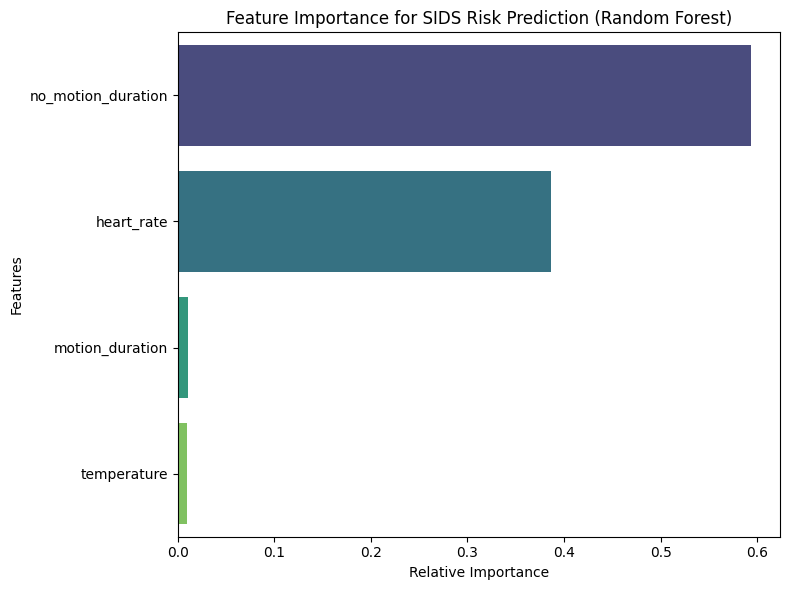

In [8]:
# --- 1. Train Random Forest (if not already trained) ---
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)  # Use scaled data
print("✅ Random Forest model trained.")

# --- 2. Visualize Feature Importance ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X.columns  # Use original feature names

# Create DataFrame for plotting
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance for SIDS Risk Prediction (Random Forest)')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Plot a Confusion Matrix & ROC CurvePlot a Confusion Matrix & ROC Curve

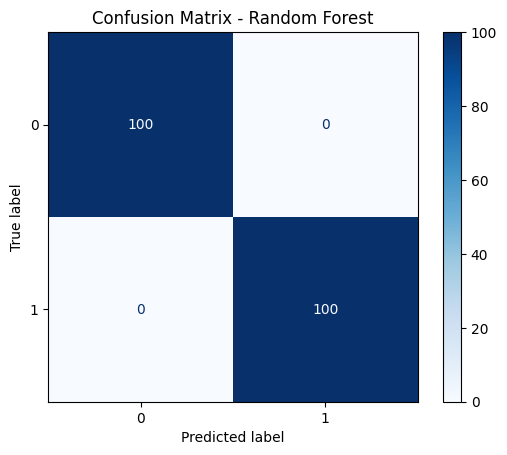

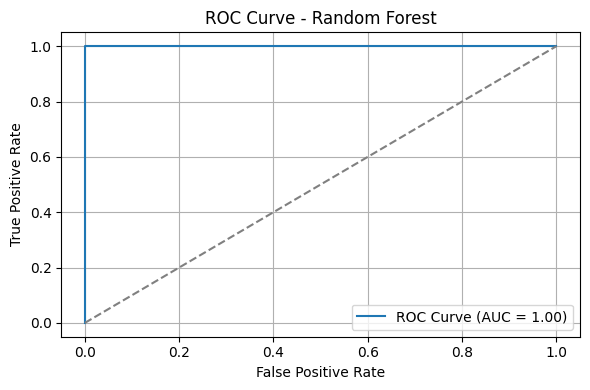

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# --- 1. Predictions ---
rf_pred = rf_model.predict(X_test_scaled)
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probability for ROC

# --- 2. Confusion Matrix ---
cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# --- 3. ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, rf_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Export Predictions to CSV

In [10]:
# Add predictions to test set
rf_pred = rf_model.predict(X_test_scaled)
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Create a DataFrame with predictions
test_results = pd.DataFrame(X_test_scaled, columns=X.columns)  # Restore feature names
test_results['Actual'] = y_test.values
test_results['Predicted'] = rf_pred
test_results['Risk_Probability'] = rf_proba

# Save to CSV
test_results.to_csv('sids_rf_predictions.csv', index=False)
print("Predictions exported to 'sids_rf_predictions.csv'")


Predictions exported to 'sids_rf_predictions.csv'
